# Базовая обработка текста

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://www.nltk.org/api/nltk.html
* https://pymorphy2.readthedocs.io/en/stable/
* https://docs.python.org/3/library/re.html
* https://regex101.com/

## Задачи для совместного разбора

1. Найдите все суммы (число плюс валюта), которые упоминаются в данном тексте. Выведите результат в виде списка кортежей из двух элементов (число, валюта)

In [ ]:
text = '''During my trip to Europe, I exchanged $10.50 for €20,00 at the currency exchange booth.
With ¥5000, I bought some souvenirs from a local market.
Later, I treated myself to a delicious meal at a restaurant, which cost me £15,99.
Finally, I converted 100₹ into the local currency to buy a traditional Indian artwork.'''

In [ ]:
import re

re.findall(r"([$€¥₹£])(\d+[.,]?\d+)", text)

[('$', '10.50'), ('€', '20,00'), ('¥', '5000'), ('£', '15,99')]

2\. Выясните, встречается ли в представленном фрагменте текста тавтология.

In [ ]:
text = '''
Вода - это жидкость, которая имеет свойство быть водой.
Она состоит из молекул, которые образуют воду.
Вода, будучи водой, обладает свойствами, характерными для воды.
Ее молекулы, составляющие воду, образуют воду, которая является водой.
Таким образом, вода, будучи водой, является водой.
'''

In [ ]:
text.split()

['Вода',
 '-',
 'это',
 'жидкость,',
 'которая',
 'имеет',
 'свойство',
 'быть',
 'водой.',
 'Она',
 'состоит',
 'из',
 'молекул,',
 'которые',
 'образуют',
 'воду.',
 'Вода,',
 'будучи',
 'водой,',
 'обладает',
 'свойствами,',
 'характерными',
 'для',
 'воды.',
 'Ее',
 'молекулы,',
 'составляющие',
 'воду,',
 'образуют',
 'воду,',
 'которая',
 'является',
 'водой.',
 'Таким',
 'образом,',
 'вода,',
 'будучи',
 'водой,',
 'является',
 'водой.']

In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt_tab')

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("\w+")
tokens = tokenizer.tokenize(text.lower())
tokens[:5]

['вода', 'это', 'жидкость', 'которая', 'имеет']

In [ ]:
from collections import Counter

Counter(tokens).most_common()

[('водой', 5),
 ('вода', 3),
 ('воду', 3),
 ('которая', 2),
 ('образуют', 2),
 ('будучи', 2),
 ('является', 2),
 ('это', 1),
 ('жидкость', 1),
 ('имеет', 1),
 ('свойство', 1),
 ('быть', 1),
 ('она', 1),
 ('состоит', 1),
 ('из', 1),
 ('молекул', 1),
 ('которые', 1),
 ('обладает', 1),
 ('свойствами', 1),
 ('характерными', 1),
 ('для', 1),
 ('воды', 1),
 ('ее', 1),
 ('молекулы', 1),
 ('составляющие', 1),
 ('таким', 1),
 ('образом', 1)]

In [ ]:
stemmer = nltk.stem.SnowballStemmer("russian")
stemmed_tokens = [stemmer.stem(token) for token in tokens]
Counter(stemmed_tokens).most_common()

[('вод', 12),
 ('котор', 3),
 ('образ', 3),
 ('свойств', 2),
 ('молекул', 2),
 ('будуч', 2),
 ('явля', 2),
 ('эт', 1),
 ('жидкост', 1),
 ('имеет', 1),
 ('быт', 1),
 ('он', 1),
 ('состо', 1),
 ('из', 1),
 ('облада', 1),
 ('характерн', 1),
 ('для', 1),
 ('е', 1),
 ('составля', 1),
 ('так', 1)]

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Исследуйте, какие формы слов встречаются в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Сгруппируйте слова по начальной форме и представьте результата в виде словаря, где ключом является начальная форма слова, а значением - список форм этого слова, которые встретились в тексте. Выведите на экран набор слов, для которых начальными формами являются "кот" или "кошка".

- [ ] Проверено на семинаре

In [85]:
import pandas as pd
from nltk import word_tokenize,regexp_tokenize
import re
import numpy as np
import random as rd 
import pymorphy3
import torch

In [10]:
data = pd.read_csv('../uni_data/files/Лучше кошки зверя нет 2.csv',header = None)
data.head(5)

0  \
0  http://forum.moya-semya.ru/index.php?app=forum...   
1  http://forum.moya-semya.ru/index.php?app=forum...   
2  http://forum.moya-semya.ru/index.php?app=forum...   
3  http://forum.moya-semya.ru/index.php?app=forum...   
4  http://forum.moya-semya.ru/index.php?app=forum...   

                                                   1        2  
0  Завтра мои котейки идут к врачу. А 21-го жду и...  Unknown  
1  Котя скучает по мужу. Со вторника спит на его ...  Unknown  
2  Получилось так, что мне пришлось "отдать" мою ...  Unknown  
3  Лучше всего для начала спросить об этом у люде...  Unknown  
4  что волонтеры принесут, то и насыпалиЗначит, к...  Unknown

In [13]:
data[2].unique()

array(['Unknown'], dtype=object)

In [19]:
data[0].apply(lambda x: x[:4]).unique()

array(['http'], dtype=object)

In [22]:
data = pd.read_csv('../uni_data/files/Лучше кошки зверя нет 2.csv',header = None,usecols = [1])
data

1
0     Завтра мои котейки идут к врачу. А 21-го жду и...
1     Котя скучает по мужу. Со вторника спит на его ...
2     Получилось так, что мне пришлось "отдать" мою ...
3     Лучше всего для начала спросить об этом у люде...
4     что волонтеры принесут, то и насыпалиЗначит, к...
...                                                 ...
1579  Надо на ночь сыпать больше корма.Я своим насып...
1580  А вот когда реально голодные - кусаются. Могут...
1581  И нет  разницы   в эмоциях  человека  и кота. ...
1582  Который деньТоже запал.Если не пристроили - на...
1583  Хочу сказать спасибо большое тем, кто  советов...

[1584 rows x 1 columns]

In [106]:
morph = pymorphy3.MorphAnalyzer(lang = 'ru')

In [39]:
one_ex = morph.parse('Перевернувшаяся')
one_ex

[Parse(word='перевернувшаяся', tag=OpencorporaTag('PRTF,perf,intr,past,actv femn,sing,nomn'), normal_form='перевернуться', score=1.0, methods_stack=((DictionaryAnalyzer(), 'перевернувшаяся', 529, 22),))]

In [41]:
type(one_ex)

list

In [43]:
len(one_ex)

1

In [45]:
type(one_ex[0])

pymorphy3.analyzer.Parse

In [94]:
one_ex[0].normal_form

'перевернуться'

In [115]:
test_value = data.iloc[0,0]
print(type(one_value))
test_value

<class 'str'>


'Завтра мои котейки идут к врачу. А 21-го жду их домой. Прошу помощи. Чем кормить лучше (корм). Какой наполнитель использовать. Коты год жили на передержке. Любым советам буду благодарна.Лучше всего для начала спросить об этом у людей, где жили коты. За год коты явно привыкли к определенному наполнителю. \xa0А дальше по обстоятельствам.Удачи! Коты - это счастье!'

In [144]:
test_list = [word for word in word_tokenize(test_value) if re.fullmatch('[А-я]*-?[А-я]$',word)]
test_list

['Завтра',
 'мои',
 'котейки',
 'идут',
 'к',
 'врачу',
 'А',
 'жду',
 'их',
 'домой',
 'Прошу',
 'помощи',
 'Чем',
 'кормить',
 'лучше',
 'корм',
 'Какой',
 'наполнитель',
 'использовать',
 'Коты',
 'год',
 'жили',
 'на',
 'передержке',
 'Любым',
 'советам',
 'буду',
 'всего',
 'для',
 'начала',
 'спросить',
 'об',
 'этом',
 'у',
 'людей',
 'где',
 'жили',
 'коты',
 'За',
 'год',
 'коты',
 'явно',
 'привыкли',
 'к',
 'определенному',
 'наполнителю',
 'А',
 'дальше',
 'по',
 'Коты',
 'это',
 'счастье']

In [145]:
def norm_and_word(word):
    #returns (norm_word,word)
    return (morph.parse(word)[0].normal_form,word)

In [184]:
main_list = []
for one_string in data.iloc[:,0]:
    tokenized_list = [word for word in word_tokenize(one_string) if re.fullmatch('[А-я]+-?[А-я]$',word)]
    main_list += list(map(norm_and_word,tokenized_list))

In [185]:
len(main_list)

144751

In [186]:
main_dict = dict()

In [187]:
for one_item in main_list:
    try:
        main_dict[one_item[0]].append(one_item[1])
    except KeyError:
        main_dict[one_item[0]] = [one_item[1]]

In [188]:
cat1 = pd.Series(main_dict['кот']).unique()
print(len(cat1))
cat1

17


array(['Коты', 'коты', 'кот', 'коту', 'котов', 'котом', 'кота', 'Кот',
       'Котам', 'Кота', 'котами', 'котам', 'Котов', 'Коте', 'Коту',
       'коте', 'котах'], dtype=object)

In [189]:
cat2 = pd.Series(main_dict['кошка']).unique()
print(len(cat2))
cat2

14


array(['кошку', 'кошка', 'кошки', 'кошек', 'кошкой', 'Кошка', 'кошками',
       'кошке', 'кошкам', 'Кошки', 'Кошек', 'Кошку', 'Кошкам', 'Кошке'],
      dtype=object)

<p class="task" id="2"></p>

2\. Получите и выведите на экран набор имён питомцев, упомянутых в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Для простоты считайте, что имя питомца начинается с заглавной буквы и стоит не в начале предложения.

- [ ] Проверено на семинаре

In [264]:
test1 = 'Кота кот. Коти кот Кошка'
pattern = r'[.?!\s]+[А-Я][а-я]+'
re.findall(pattern,test1)

['. Коти', ' Кошка']

In [280]:
all_names = []
for one_string in data.iloc[:,0]:
    res = re.findall(pattern,one_string)
    for one_res in res:
        if not re.findall('[.?!]',one_res):
            all_names.append(one_res.strip())

In [283]:
pd.Series(all_names).unique()

array(['Котя', 'Зосю', 'Барса', ..., 'Сыночка', 'Сыночки', 'Василием'],
      shape=(1059,), dtype=object)

<p class="task" id="3"></p>

3\. Вычислите среднюю длину сообщения (в количестве предложений) в различных темах форума газеты "Моя Семья" (каждый файл из каталога `data/moya-semia` соответствует отдельной теме". Представьте результат в виде столбчатой диаграммы. Подпишите рисунок и дайте названия осям.

- [ ] Проверено на семинаре

In [298]:
some_str = 'kjdjfs?   kjdf!jdfldk...jfkd.'

In [300]:
re.findall('[^.!?]*[.!?]',some_str)

['kjdjfs?', '   kjdf!', 'jdfldk.', '.', '.', 'jfkd.']

In [304]:
[item for item in re.findall('[^.!?]*[.!?]',some_str) if re.findall('[A-z]',item)]

['kjdjfs?', '   kjdf!', 'jdfldk.', 'jfkd.']

In [308]:
def get_clause_num(some_string):
    return len([item for item in re.findall('[^.!?]*[.!?]',some_string) if re.findall('[А-я]',item)])

In [312]:
get_clause_num('Привет. Меня зовут Лучиан!Как дела?      Почему...Как.')

5

In [314]:
get_clause_num('Привет. Меня зовут Лучиан!Как дела?      Почему...Как')

4

In [404]:
#Если предложение не заканчивается на нужный знак припинания получаетя на одно предложение меньше
#=> нужно проверить на что заканчиваются все строки датасета

In [407]:
test_data = pd.read_csv('/home/luchian/prog/uni_prog/uni_data/files/Бенгалы.csv',header = None,usecols = [1])
list_of_end_signs = []
for item in test_data.iloc[:,0]:
    list_of_end_signs.append(item[-1])

In [413]:
pd.Series(list_of_end_signs).unique()

array(['я', '.', '!', '?', ')', '"'], dtype=object)

In [415]:
for item in test_data.iloc[:,0]:
    if item[-1] in ['я','"',')']:
        print(item,end = '\n\n')

. Ричи у меня на даче передушил всю живность, не успеваю отбивать: птенцы, лягушки, кузнечики, ящерицы. Прям садюга какая-то!Заодно и вредителей же  я за крота свою расцеловала прям  правда она уже за белок взялась.Оба бенгала прекрасно ходят гулять на 5-тиметровой собачьей рулетке. И они прямо тянут шнур, бегут вперёд.Вот это очень интересно, прям даёт ошейник одеть и не беспокоит это его?Я с Ричи даже в лес ходила гулять.Моя кошка и без поводка с нами в лес ходитИз недостатков. Очень навязчивые в общении. Если я только взглянула на Ричи, он ловит мой взгляд, радостно мыркает утробно и бросается гладится, хоть я его и не звала вовсе.Интересно.Это она не просто корм выпрашивает, а пакетик с паучем.Ого, моя тоже  просит именно пакетик  смотрит в глаза и бодаетЧем попало кормить нельзя, слабые желудки. Ирония судьбы: Ричи, который сам вызывает у многих страшную аллергию, сам жутко страдает от неё. Сейчас осеннее обострение, об любого корма текут глаза и весь чешется. Я уже замучилась с н

In [416]:
#Все случаи без ожидаемых знаков в конце нужно считать отдельными предложения как видно из выведенных примеров
#Более того из 2 примера видноб что предложения могут заканчиваться на )
# из 1 примера видно, что между предложениями может вообще и не быть знака препинания

In [493]:
def get_clause_num(some_string):
    the_split = re.findall(r'[А-Я][^.!?)]*[.!?)]?',some_string)
    return the_split

In [496]:
#добавим знак )
#будем учитывать, что в конце предлож может и не быть знака препинания
#Но при этом тогда будем думать что кадое новое предлож начинается с аглав буквы
#вообще может начинаться и с цифр предлож, но цифры могут сводиться к буквам

In [494]:
get_clause_num('Привет. Меня зовут Лучиан!Как дела?      Почему...Как')

['Привет.', 'Меня зовут Лучиан!', 'Как дела?', 'Почему.', 'Как']

In [497]:
ex_str = 'ПриветПока. Рыба-меч.'
get_clause_num(ex_str)

['ПриветПока.', 'Рыба-меч.']

In [501]:
#При этом мы еще не избавились от склеиных предложений

In [503]:
def get_clause_num(some_string):
    the_num_list = []
    the_split = re.findall(r'[А-Я][^.!?)]*[.!?)]?',some_string)
    for item in the_split:
        #решает проблему с тем, что Между предложениями ничего нет
        how_many_glued = re.findall('[а-я][А-Я]',item) #паттерн склееных предложений
        if how_many_glued:
            the_num_list.append(1 + len(how_many_glued))
        else:
            the_num_list.append(1)
    return sum(the_num_list)

In [506]:
get_clause_num(ex_str)

3

In [514]:
def test(N = 5):
    for _ in range(N):
        rand_num = rd.randint(1,len(test_data))
        test_ex = test_data.iloc[rand_num,0]
        print(f'Number of sentances: {get_clause_num(test_ex)}')
        print(test_ex,end = '\n\n')

In [516]:
test(5)

Number of sentances: 8
Помогите мне понять - это нормальное поведение для бенгала?Приблудыш бенгал взял моду бросаться сзади. То есть сидит с индифферентным видом, ты мимо проходишь - а этот хищник бросается сзади как кобра. Вцепляется зубами и задними лапами. А там когти как стилеты, хотя стригли недавно.В итоге у дочери на ноге синяк от зубов и борозды от когтей. У меня то же самое, только без синяка.Есть ли шанс привести его в чувство?

Number of sentances: 13
А я Соньке поставила коробку картонную возле себя, большую.,прорезала оконце. Сонька обожает там возиться. А я обожаю засунуть туда руку, и её там тискать. Но чревато. Иногда Сонька со сладострастием втыкает в меня свои клыки. Хорошо так втыкает, до крови. Руку нельзя внезапно вытащить, сразу бросится ловить, и хана конечности. Вытаскиваю очень медленно. Сигналит оттуда хищными глазами. И чего меня опять разбирает руки туда засовывать? Мазохистка! Вон сидит сверкает жёлтыми  глазищами. Анаконда!

Number of sentances: 20
Кстати

In [518]:
#в 4 примере правильно обработались склееные предложения 
#Во втором примере непонятно как нужно смотреть на ,. после которой стоит слово с маленькой буквы
#Будем считать, что это ; но тогда это не новое предложение, хотя возможно и подразумевалось новое, но тогда оно должно начинаться
# c заглав
#а так впринципе все норм

In [553]:
def get_statistics(file_path):
    main_data = pd.read_csv(file_path,header = None,usecols = [1])
    main_data = main_data.dropna()
    main_list = []
    for one_item in main_data.iloc[:,0]:
        main_list.append(get_clause_num(one_item))
    return float(np.array(main_list).mean())

In [563]:
stat1 = get_statistics('/home/luchian/prog/uni_prog/uni_data/files/Бенгалы.csv')
stat2 = get_statistics('/home/luchian/prog/uni_prog/uni_data/files/Таксы.csv')
stat3 = get_statistics('/home/luchian/prog/uni_prog/uni_data/files/Немецкая овчарка.csv')
stat4 = get_statistics('/home/luchian/prog/uni_prog/uni_data/files/Лучше кошки зверя нет 2.csv')

In [589]:
import matplotlib.pyplot as plt

def plot_average_stats(data):
    labels = ['Бенгалы','Таксы','Немецкая овчарка','Лучше кошки ']
    
    figure = plt.figure(figsize = (13,3),facecolor = 'skyblue')
    ax = figure.add_subplot()
    ax.grid(linestyle = '--',c = 'red',alpha = 0.3)
    ax.bar(labels, data,color = 'black')
    
    ax.set_title("Average number of senatances") 
    ax.set_ylabel("average number")
    ax.set_ylim(bottom=0)
    
    return ax

<Axes: title={'center': 'Average number of senatances'}, ylabel='average number'>

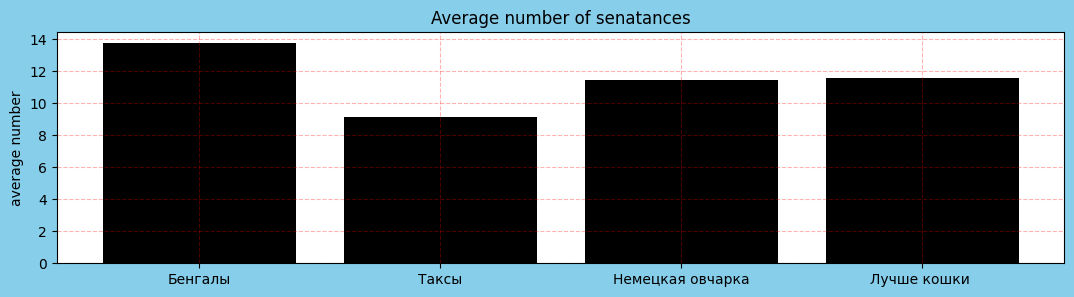

In [590]:
plot_average_stats([stat1,stat2,stat3,stat4])

<p class="task" id="4"></p>

4\. Замените все текстовые смайлики из файла `livejounal/психология.csv` на соответствующие символы юникода. Для поиска смайликов воспользуйтесь регулярными выражениями. Ниже представлен список (не исчерпывающий) примеров возможных смайликов и символ, на который их нужно заменить:

* :=), =-), =-))), ))) и т.д. -> \u263A
* ;), ;-), ;-)) и т.д. -> \U0001F609
* :D, :-D, =-D, =-DDD и т.д. -> \U0001F600
* :=(, :-(, =-(((, (((, ;-( и т.д. -> \U0001F641
- [ ] Проверено на семинаре

In [3]:
em_data = pd.read_csv('/home/luchian/prog/uni_prog/uni_data/files/психология.csv',usecols = ['text','comments'])

In [4]:
def find_emoj(some_string):
    ret = re.findall(r'[:;=^x]-?[()^D]+|\){2,}|\({2,}',some_string)
    return ret

In [7]:
one_ex = em_data['comments'][rd.randint(1,len(em_data))]
some_string = 'оваолывтат д . kdsjg п=)),. '

In [8]:
test1 = find_emoj(one_ex)
print(len(test1))
test1

4


[':)', '))))', ':)))', '))']

In [9]:
one_ex

'[\'+100500\', \'вообще не интересно как какакя то чужая тетка лезет в вас издевается доводит до нетерпимой боли и в итоге крутитвашими мозгами на свой тетошный лад. играет в вас, пока вы ей платите, перестанеие-пошлет вас лесом с вашими проблемамипрекратите эту х... ю, вы сами не менее достойный и умелый человек, вы сами  сможете настроить свои мозги, хватит бояться что то делать и надеяться на других, например на тетенек, что еще раз, тупо играет в вас.пока сами не возьметесь, будетеу лететь в эту пропасть.  знаю, о чем пришу. корги привет.жж топ кто тот фильтрует, френк???\', \'\\\\"Короче, это больно, неприятно и дорого. \\\\"А депрессия — просто больно и неприятно.\', \'4 месяца ушли просто на знакомство.... Сколько у вас лишних денежек.. платить за знакомство... \\\\"Но, во-первых, это очень интересно (целый час говорить только о себе! Нечасто можно себе такое позволить)\\\\" Платить денежки за возможность поговорить о себе. Как то это убого звучит. Типа как мужику никто бесплатн

In [63]:
the_list_of_emojis = []
for one_item in np.array(em_data):
    t1 = find_emoj(one_item[0])
    t2 = find_emoj(one_item[1])
    the_list_of_emojis += t1 
    the_list_of_emojis += t2

In [64]:
print(len(the_list_of_emojis))
the_list_of_emojis[:5]

2331


[':)', ':)', ':)', ':)', '))']

In [65]:
change_dict = {
    '\U0001F642':[],
    '\U0001F606':[],
    '\U0001F609':[],
    '\U0001F600':[],
    '\u263A':[],
    '\U0001F641':[],
    '\U00002639':[],
    '\U0001F615':[]
}

In [485]:
'\u263A'

'☺'

ERROR! Session/line number was not unique in database. History logging moved to new session 19


In [480]:
'\U0001F642'

'🙂'

In [482]:
'\U0001F606'

'😆'

In [494]:
'\U0001F609'

'😉'

In [496]:
'\U0001F600'

'😀'

In [504]:
'\U0001F641'

'🙁'

In [506]:
'\U00002639'

'☹'

In [23]:
'\U0001F615'

'😕'

In [38]:
[item for item in the_list_of_emojis if 'x' in item]

['xD', 'x)', 'xD']

In [86]:
for emoj in the_list_of_emojis:
    if '=' in emoj and ')' in emoj:
        change_dict['\u263A'].append(emoj)
    elif '=' in emoj and '(' in emoj:
        change_dict['\U00002639'].append(emoj)
    elif len(re.findall('[^(]',emoj)) == 0:
        change_dict['\U0001F641'].append(emoj)
    elif len(re.findall('[^)]',emoj)) == 0:
        change_dict['\U0001F642'].append(emoj)
    elif ':' in emoj and ')' in emoj:
        change_dict['\U0001F600'].append(emoj)
    elif ';' in emoj and ')' in emoj:
        change_dict['\U0001F609'].append(emoj)
    elif 'x' in emoj:
        change_dict['\U0001F606'].append(emoj)
    elif ':' in emoj and '(' in emoj:
        change_dict['\U0001F615'].append(emoj)

In [67]:
check_list = []
for key in change_dict:
    check_list += change_dict[key]
print(len(check_list))

2321


In [74]:
missed = []
for emoj in the_list_of_emojis:
    if emoj not in check_list:
        missed.append(emoj)

In [75]:
missed

[':D', ':-D', ':D', ':-D', ';-(', '=D', '=D', ':D', ';(((', ';-(']

In [85]:
change_dict = {
    '\U0001F642':[],
    '\U0001F606':[],
    '\U0001F609':[],
    '\U0001F600':[],
    '\u263A':[],
    '\U0001F641':[],
    '\U00002639':[],
    '\U0001F615':[],
    '\U0001F622':[]
}

In [87]:
'\U0001F622'

'😢'

In [88]:
for emoj in the_list_of_emojis:
    if 'D' in emoj and 'x' not in emoj:
        change_dict['\U0001F600'].append(emoj)
    elif ';' in emoj and '(' in emoj:
        change_dict['\U0001F622'].append(emoj)

In [89]:
check_list = []
for key in change_dict:
    check_list += change_dict[key]
print(len(check_list))

2331


In [91]:
len(check_list) == len(the_list_of_emojis)

True

In [92]:
def get_uni(emoj):
    for key in change_dict:
        for em in change_dict[key]:
            if em == emoj:
                return key

In [96]:
get_uni(':)')

'😀'

In [99]:
get_uni(';-(')

'😢'

In [108]:
a = 'jdf:)kj...j:)'
a.replace(':)',get_uni(':)'))

'jdf😀kj...j😀'

In [112]:
def change_to_uni(the_string):
    emjs = find_emoj(the_string)
    current_string = the_string
    for one_em in emjs:
        current_string = the_string.replace(one_em,get_uni(one_em))
    return current_string

In [120]:
text_example = em_data['text'][rd.randint(1,len(em_data))]
text_example

'О кошке Моте как эталоне вашей адаптации.\nВчера у нас с обожаемой мной кошкой Мотей случилось ЧП. Дело было так. Ложимся мы спать (а Мотя всегда спит на моем правом боку). Она мурлыкает, я книжку читаю. И вдруг...Она как ощетинится и прыгнет мне на подушку! Я в недоумении поворачиваю голову и вижу как по стене ползет таракан (а надо ли говорить, что я тараканов до судорог не переношу) Я заорала так, будто это не таракан, а королевская кобра. Мотя от моего ора в сторону. А таракан себе ползет. Ему пофигу. И тут кошка Мотя в прыжке убивает и сжирает таракана.\nЯ сижу на кровати. Меня трясет. Кошка Мотя, показав, что проблема устранена, забирается ко мне на колени и начинает истошно мурлыкать. С громкостью хорошего пылесоса. И мурлыкает так больше часа пока я, успокоившись и об нее пригревшись, не засыпаю\xa0\nНаутро я вспомнила,что полтора года назад, когда Мотя только появилась, все шутила, что Мотя как кандидат прошла самую успешную алаптацию в компании за все 20 лет моей карьерной р

In [121]:
change_to_uni(text_example)

'О кошке Моте как эталоне вашей адаптации.\nВчера у нас с обожаемой мной кошкой Мотей случилось ЧП. Дело было так. Ложимся мы спать (а Мотя всегда спит на моем правом боку). Она мурлыкает, я книжку читаю. И вдруг...Она как ощетинится и прыгнет мне на подушку! Я в недоумении поворачиваю голову и вижу как по стене ползет таракан (а надо ли говорить, что я тараканов до судорог не переношу) Я заорала так, будто это не таракан, а королевская кобра. Мотя от моего ора в сторону. А таракан себе ползет. Ему пофигу. И тут кошка Мотя в прыжке убивает и сжирает таракана.\nЯ сижу на кровати. Меня трясет. Кошка Мотя, показав, что проблема устранена, забирается ко мне на колени и начинает истошно мурлыкать. С громкостью хорошего пылесоса. И мурлыкает так больше часа пока я, успокоившись и об нее пригревшись, не засыпаю\xa0\nНаутро я вспомнила,что полтора года назад, когда Мотя только появилась, все шутила, что Мотя как кандидат прошла самую успешную алаптацию в компании за все 20 лет моей карьерной р

In [123]:
em_data['text'] = em_data['text'].apply(change_to_uni)
em_data['comments'] = em_data['comments'].apply(change_to_uni)

In [153]:
em_data['comments'][rd.randint(1,len(em_data))]

'[\'были в Древней Греции разные РАЗНЫЕ ШКОЛЫ ФИЛОСОФСКИЕПлатона там. Аристотеля..очень популярны были школы эпикурейские /Эпикур/ и стоиков/ Зенон т.д/последние были очень в чести в Древнем Риме, такой имперский стайлэпикурейцы же /лабковцы, читай, древние/ считали, что надо получать удовольствие от того , что есть , а не лезть в гору за бОльшим, что -то там преодолевая/.Просто удивительно, что некий господин, всячески раскручивается сейчас на столь старой теме, как будто это все сегодня случилось и не было мучительных метаий тысячелетней истории человеков. Психологи, доморощенные.\', \'Признаться ни разу о нем не слышала, но после вашего поста заинтересовал. Спасибо за рекомендацию, послушаем. :)\', \'\\\\"Я делаю, что хочу\\\\"...Нет,в такой формулировке, конечно, нет проблем: делай что хочешь и будет счастье. Проблема появляется тогда, когда человек упирается в вопрос, а что такое, собственно, - \\\\"я\\\\", и того ли оно хочет, что я делаю.\', \'С этим я не спорю.\', \'Недавно отк

In [154]:
em_data.to_csv('психология.csv',encoding = 'utf-8')

<p class="task" id="5"></p>

5\. Для каждого поста из файла `livejounal/психология.csv` создайте числовой вектор, в котором содержится следующая информация

* количество абзацев
* количество предложений
* количество слов
* количество смайликов \u263A
* количество смайликов \U0001F609
* количество смайликов \U0001F600
* количество смайликов \U0001F641

Полученный результат представьте в виде тензора `torch.Tensor`.

- [ ] Проверено на семинаре

In [2]:
psycho_data = pd.read_csv('психология.csv',index_col = 0)
psycho_data

text  \
0    Выход из депрессии....\nСегодня, 24 марта, Меж...   
1    Избегание, агрессия, пессимизм: 22 признака де...   
2    "Я чувствую, что не надо ехать" - этого достат...   
3    Пять причин беспорядка в доме и способы борьбы...   
4    Чувство Дома.\nКак эта шутка... "Ты где?" - "Д...   
..                                                 ...   
848     Шесть признаков того, что вами манипулируют.\n   
849  Дебют "Магистрали": впечатления пессимиста.\nИ...   
850  Отличный способ вернуть бывшего.\nЛучший спосо...   
851  Самый опасный тип мужчин.\nОткрою страшную тай...   
852  Чего хотят люди? Признания!.\nПотребность чело...   

                                              comments  
0    ['Спасибо за полезный пост! Кажется, что сейча...  
1    ['Знаете, я нашла в Вашем посте более сотни пр...  
2    ['Здравствуйте! Система категоризации Живого Ж...  
3    ['Основных причин невозможности содержать в по...  
4    ['Ваша запись Чувство Дома в LiveJournal Media...  
..                                                 ...  
848  ['С одной стороны, да, а с другой - если друг ...  
849  ['Ну, все равно, попытка хорошая. Может настро...  
850  ['Хороший способ вернуть - выпхать сразу к люб...  
851  ['С родителями спокойно :-))) Приезжаю к Папе ...  
852  ['Здравствуйте! Система категоризации Живого Ж...  

[853 rows x 2 columns]

In [13]:
ex_string = psycho_data['text'][rd.randint(1,len(psycho_data))]
ex_string

'Мальчики не плачут или Прочь от инфантильности к мужественности.\nЧто чувствуют мужчины? Чувствуем ли мы то же самое, что и женщины?\nЧасто мужчины пренебрегают своими эмоциями и переживаниями, не придают им значения, порой и вовсе подавляют.\nНасколько плохо такое невнимание к своим эмоциям? Что происходит, если их сдерживать?\nОпасно \xa0любое подавление эмоций. Психосоматические заболевания как раз и \xa0рождаются на основе вытесненных и недопережитых эмоций, как выяснили \xa0психологи ещё во времена И.М.Сеченова.\nКакие есть способы \xa0экологичного выражения чувств, во-первых, так сказать, не стыдные для \xa0солидного мужчины, во-вторых, не опасные для окружающих?\nНеформальное продолжение темы: Чего хотят мужчины или Новый манифест мужика\n\n\n\n\n\n\nИнфантильное: "дали" и "не дали"\nПо сути, все \xa0эмоции вторичны по отношению к двум базовым: довольству и недовольству. \xa0Если предельно упростить, любой негативный эмоциональный фон (гнев, \xa0уныние, разочарование) возникает

In [81]:
def get_para(the_string):
    ret = re.findall(r'\s{3,}',the_string)
    return len(ret) + 1

In [82]:
get_para(ex_string)

3

In [38]:
def get_clause_num(some_string):
    the_num_list = []
    the_split = re.findall(r'[А-Я][^.!?)]*[.!?)]?',some_string)
    for item in the_split:
        how_many_glued = re.findall('[а-я][А-Я]',item)
        if how_many_glued:
            the_num_list.append(1 + len(how_many_glued))
        else:
            the_num_list.append(1)
    return sum(the_num_list)

In [39]:
get_clause_num(ex_string)

264

In [45]:
def get_word_num(the_string):
    ret = re.findall('[А-я]+|[A-z]+',the_string)
    return len(ret)

In [51]:
get_word_num(ex_string)

3027

In [64]:
def get_em1(the_string):
    ret = re.findall('(\u263A)',the_string)
    return len(ret)

In [70]:
def get_em2(the_string):
    ret = re.findall('(\U0001F609)',the_string)
    return len(ret)

In [71]:
def get_em3(the_string):
    ret = re.findall('(\U0001F600)',the_string)
    return len(ret)

In [73]:
def get_em4(the_string):
    ret = re.findall('(\U0001F641)',the_string)
    return len(ret)

In [83]:
to_tensor_list = []
for item in psycho_data['text']:
    stat_list = [
        get_para(item),
        get_clause_num(item),
        get_word_num(item),
        get_em1(item),
        get_em2(item),
        get_em3(item),
        get_em4(item)
    ]
    to_tensor_list.append(stat_list)

In [87]:
text_list = torch.tensor(to_tensor_list,dtype = torch.int64)
text_list 

tensor([[   7,  187, 2282,  ...,    0,    2,    0],
        [  13,  319, 4539,  ...,    0,    0,    0],
        [   1,   92,  866,  ...,    0,    0,    0],
        ...,
        [   1,   71,  716,  ...,    0,    0,    0],
        [   1,   71,  954,  ...,    0,    0,    0],
        [   1,   47,  937,  ...,    0,    0,    0]])

In [88]:
to_tensor_list_comments = []
for item in psycho_data['comments']:
    stat_list = [
        get_para(item),
        get_clause_num(item),
        get_word_num(item),
        get_em1(item),
        get_em2(item),
        get_em3(item),
        get_em4(item)
    ]
    to_tensor_list_comments.append(stat_list)

In [90]:
comment_list = torch.tensor(to_tensor_list_comments,dtype = torch.int64)
comment_list 

tensor([[   1,  105, 1320,  ...,    0,    2,    0],
        [   1,   66,  838,  ...,    0,    0,    0],
        [   1,   15,  168,  ...,    0,    0,    0],
        ...,
        [   1,   51,  506,  ...,    0,    1,    0],
        [   1,   34,  555,  ...,    0,    0,    0],
        [   1,   64,  948,  ...,    0,    0,    0]])

<p class="task" id="6"></p>

6\. На основе файла `livejounal/психология.csv` выясните, кто из пользователей обладает наиболее широким словарным запасом (т.е. использовал максимальное количество различных слов в своих постах). При подсчете количества слов не учитывайте различные формы одного и того же слова, а также токены, не являющиеся словами (знаки препинания, цифры и т.д.). Выведите на экран имя пользователя и набор используемых им различных слов.

- [ ] Проверено на семинаре

In [93]:
#находим слова с помощью регулярок
#приводим каждое к нормальному виду
#добавляем в множество

In [94]:
some_set = set()

In [96]:
some_set.add(1)

In [104]:
some_set.add(2)

In [107]:
some_set

{1, 2}

In [111]:
morph.parse('Прыгнувший')[0].normal_form

'прыгнуть'

In [113]:
morph.parse('Не')[0].normal_form

'не'

In [128]:
auth_data = pd.read_csv('/home/luchian/prog/uni_prog/uni_data/files/психология.csv',usecols = ['author','text'])
auth_data.dropna(inplace = True)

In [129]:
auth_data

author  \
0          https://marikarai.livejournal.com/   
1       https://psychologies.livejournal.com/   
2     https://kornilovasasha.livejournal.com/   
3      https://rmnt-official.livejournal.com/   
4     https://kornilovasasha.livejournal.com/   
..                                        ...   
848           https://shakty.livejournal.com/   
849      https://moscow-i-ya.livejournal.com/   
850                     https://lena-miro.ru/   
851         https://cosharel.livejournal.com/   
852  https://dmitrymagazinov.livejournal.com/   

                                                  text  
0    Выход из депрессии....\nСегодня, 24 марта, Меж...  
1    Избегание, агрессия, пессимизм: 22 признака де...  
2    "Я чувствую, что не надо ехать" - этого достат...  
3    Пять причин беспорядка в доме и способы борьбы...  
4    Чувство Дома.\nКак эта шутка... "Ты где?" - "Д...  
..                                                 ...  
848     Шесть признаков того, что вами манипулируют.\n  
849  Дебют "Магистрали": впечатления пессимиста.\nИ...  
850  Отличный способ вернуть бывшего.\nЛучший спосо...  
851  Самый опасный тип мужчин.\nОткрою страшную тай...  
852  Чего хотят люди? Признания!.\nПотребность чело...  

[823 rows x 2 columns]

In [132]:
print(len(auth_data))

823


In [135]:
auth_data['author'].unique().shape

(290,)

In [195]:
calc_dict = {auth:[] for auth in auth_data['author'].unique()}

In [197]:
len(calc_dict)

290

In [168]:
auth_data

author  \
0          https://marikarai.livejournal.com/   
1       https://psychologies.livejournal.com/   
2     https://kornilovasasha.livejournal.com/   
3      https://rmnt-official.livejournal.com/   
4     https://kornilovasasha.livejournal.com/   
..                                        ...   
848           https://shakty.livejournal.com/   
849      https://moscow-i-ya.livejournal.com/   
850                     https://lena-miro.ru/   
851         https://cosharel.livejournal.com/   
852  https://dmitrymagazinov.livejournal.com/   

                                                  text  
0    Выход из депрессии....\nСегодня, 24 марта, Меж...  
1    Избегание, агрессия, пессимизм: 22 признака де...  
2    "Я чувствую, что не надо ехать" - этого достат...  
3    Пять причин беспорядка в доме и способы борьбы...  
4    Чувство Дома.\nКак эта шутка... "Ты где?" - "Д...  
..                                                 ...  
848     Шесть признаков того, что вами манипулируют.\n  
849  Дебют "Магистрали": впечатления пессимиста.\nИ...  
850  Отличный способ вернуть бывшего.\nЛучший спосо...  
851  Самый опасный тип мужчин.\nОткрою страшную тай...  
852  Чего хотят люди? Признания!.\nПотребность чело...  

[823 rows x 2 columns]

In [193]:
auth_data[auth_data['author'] == id_dict['2']]

author  \
2  https://kornilovasasha.livejournal.com/   
4  https://kornilovasasha.livejournal.com/   

                                                text  
2  "Я чувствую, что не надо ехать" - этого достат...  
4  Чувство Дома.\nКак эта шутка... "Ты где?" - "Д...

In [229]:
def get_the_words(the_string):
    ret = re.findall('[А-я]+|[A-z]+',the_string)
    return ret

In [233]:
one_example = auth_data['text'][0]

In [222]:
the_list_of_words = get_the_words(one_example)
the_list_of_words[:5]

['прекрасный', 'боль', 'кровавый', 'большой', 'запах']

In [210]:
norm_set = set()

In [211]:
for one_word in the_list_of_words:
    norm_word = morph.parse(one_word)[0].normal_form
    norm_set.add(norm_word)

In [216]:
len(norm_set) #тут меньше слов потому что 
#мы приводим к нормальной форме и + убираем дупликаты (своство множества)

415

In [217]:
len(the_list_of_words)

2282

In [218]:
#осталось реализовать это в функцию 

In [241]:
def get_the_words(the_string):
    ret = re.findall('[А-я]+|[A-z]+',the_string) #all words
    norm_set = set()
    for one_word in ret:
        norm_word = morph.parse(one_word)[0].normal_form
        norm_set.add(norm_word)
    return list(norm_set)

In [242]:
exx = get_the_words(auth_data['text'][57])
len(exx)

240

In [243]:
for one_author in auth_data['author'].unique():
    texts = auth_data[auth_data['author'] == one_author]['text']
    main_list = []
    for one_text in texts:
        the_words = get_the_words(one_text) #returns a list(or set) of words 
        main_list += the_words
    calc_dict[one_author] += main_list

In [244]:
calc_dict

{'https://marikarai.livejournal.com/': ['прекрасный',
  'боль',
  'кровавый',
  'большой',
  'запах',
  'хоть',
  'поиск',
  'институт',
  'слышать',
  'произойти',
  'оставаться',
  'материальный',
  'три',
  'ли',
  'ещё',
  'дом',
  'узнавать',
  'каковой',
  'начало',
  'долго',
  'выйти',
  'го',
  'коцать',
  'самооценка',
  'уйти',
  'паблик',
  'за',
  'подросток',
  'лекция',
  'сделать',
  'пора',
  'абсолютный',
  'короткий',
  'медицина',
  'лезвие',
  'обида',
  'тд',
  'умереть',
  'день',
  'такой',
  'глупый',
  'чтоб',
  'гарвард',
  'они',
  'расчленёнка',
  'анатомический',
  'мир',
  'себя',
  'чувствовать',
  'зависеть',
  'круто',
  'поддаться',
  'я',
  'подписать',
  'морда',
  'управлять',
  'смерть',
  'до',
  'пугать',
  'родный',
  'делиться',
  'пати',
  'помочь',
  'подумать',
  'правильно',
  'поле',
  'осознание',
  'мировоззрение',
  'угодный',
  'жить',
  'душа',
  'совершенный',
  'очень',
  'какой',
  'разорвать',
  'понять',
  'поэтому',
  'жж',
  '

In [254]:
auths = calc_dict.keys()
counts = calc_dict.values()

In [257]:
ans_dataframe = pd.DataFrame({
    'Authors':auths,
    'Word_count': [len(one_list) for one_list in counts]
})

In [265]:
ans_dataframe = ans_dataframe.sort_values('Word_count',ascending = False)

In [266]:
ans_dataframe

Authors  Word_count
151   https://borismedinskiy.livejournal.com/       17323
121          https://lika-bo.livejournal.com/       12150
18            https://dpmmax.livejournal.com/       11361
10     https://morena-morana.livejournal.com/       10679
102  https://bookmatejournal.livejournal.com/        7129
..                                        ...         ...
153   https://naivny-chukcha.livejournal.com/           4
105     https://svetlanaszim.livejournal.com/           3
256             https://tema.livejournal.com/           1
77          https://tineodin.livejournal.com/           1
176        https://langelino.livejournal.com/           1

[290 rows x 2 columns]

In [267]:
ans_dataframe.iloc[0,:]

Authors       https://borismedinskiy.livejournal.com/
Word_count                                      17323
Name: 151, dtype: object

In [269]:
words_used = calc_dict['https://borismedinskiy.livejournal.com/']
words_used

['действительно',
 'максимально',
 'интересный',
 'впрочем',
 'большой',
 'отд',
 'язык',
 'питать',
 'универсальный',
 'необходимость',
 'идеальный',
 'ложный',
 'хоть',
 'помогать',
 'психологически',
 'выпуклый',
 'смешной',
 'пропустить',
 'обозначить',
 'картина',
 'com',
 'бесперспективный',
 'завистливый',
 'веточка',
 'чь',
 'важно',
 'три',
 'уточнение',
 'аспект',
 'ли',
 'отч',
 'личный',
 'подходящий',
 'развивать',
 'круг',
 'вниз',
 'реакция',
 'большинство',
 'chast',
 'извне',
 'признавать',
 'скромность',
 'философия',
 'спонтанность',
 'бессловесный',
 'фантазия',
 'высекать',
 'устойчивый',
 'авторский',
 'оценка',
 'умение',
 'собственный',
 'рассмотреть',
 'выбор',
 'вспоминать',
 'экзальтация',
 'нравственный',
 'процитировать',
 'пол',
 'свойство',
 'окончательный',
 'страдание',
 'за',
 'стремиться',
 'население',
 'отдаваться',
 'личностный',
 'борис',
 'лекция',
 'сделать',
 'капиталистический',
 'увы',
 'невозможный',
 'спорный',
 'насекомое',
 'недоверчивый'